In [ ]:
!python --version

Python 3.10.12


# ✍️👨‍💻 introdução à classificação

In [ ]:
# porco ou cachorro

In [ ]:
# estimadores

In [ ]:
# aprendizado supervisionado

In [ ]:
# colunas de características/features = x

In [ ]:
# coluna de clasificação = y

In [ ]:
# em classificações binárias, temos de taxa de acerto/acurácia

In [ ]:
# features (1 == sim, 0 == não)
# pelo longo?
# perna curta?
# faz auau?

porco_1 = [0, 1, 0]
porco_2 = [0, 1, 1]
porco_3 = [1, 1, 0]

cachorro_1 = [0, 1, 1]
cachorro_2 = [1, 0, 1]
cachorro_3 = [1, 1, 1]

# conjunto de features
treino_x = [porco_1, porco_2, porco_3,
            cachorro_1, cachorro_2, cachorro_3]

# 1 == porco, 0 == cachorro
treino_y = [1, 1, 1,
            0, 0, 0] # labels

In [ ]:
# de alguma maneira, ter alguém capaz de estimar a classe do dado

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
model = LinearSVC()

# supervisionado passamos as classes também
model.fit(treino_x, treino_y)

LinearSVC()

In [ ]:
# pelo longo
# perna curta
# faz auau

animal_misterioso = [1, 1, 1]

In [ ]:
model.predict([animal_misterioso])

array([0])

In [ ]:
# 0 == cachorro, 1 == porco

In [ ]:
mistério_1 = [1, 1, 1]
mistério_2 = [1, 1, 0]
mistério_3 = [0, 1, 1]

texte_x = [mistério_1, mistério_2, mistério_3]
teste_y = [0, 1, 1]

In [ ]:
previsões = model.predict(texte_x)
previsões

array([0, 1, 0])

In [ ]:
# errou 1 de 3

In [ ]:
# taxa de acerto?

In [ ]:
previsões == teste_y

array([ True,  True, False])

In [ ]:
corretos = (previsões == teste_y).sum()

total = len(texte_x)

taxa_de_acertos = corretos / total
taxa_de_acertos * 100

66.66666666666666

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# taxa
accuracy_score(teste_y, previsões) * 100

66.66666666666666

In [ ]:
# número de itens acertados
accuracy_score(teste_y, previsões, normalize=False)

2

# ✍️👨‍💻 testes replicáveis, estratificação e lendo dados da internet

In [ ]:
import pandas as pd

In [ ]:
caminho = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'

In [ ]:
dados = pd.read_csv(caminho)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
map = {'home':'principal',
       'how_it_works':'como_funciona',
       'contact':'contato',
       'bought':'comprou'}

In [ ]:
dados = dados.rename(columns=map)
dados.head()

,principal,como_funciona,contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
# as três primeiras colunas são nosso x, ou seja, nossas features

In [ ]:
x = dados.iloc[:, :3]
x.head()

,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [ ]:
y = dados.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [ ]:
# separar os dados de treino e teste

In [ ]:
# caso contrário, basta o algoritmo memorizar

In [ ]:
# pois se torna incapaz de acertar coisas fora desse conjunto

In [ ]:
dados.shape

(99, 4)

In [ ]:
# 75% treino
# 25% teste

In [ ]:
treino_x = x[:75]
treino_x.shape

(75, 3)

In [ ]:
treino_y = y[:75]
treino_y.shape

(75,)

In [ ]:
teste_x = x[75:]
teste_x.shape

(24, 3)

In [ ]:
teste_y = y[75:]
teste_y.shape

(24,)

In [ ]:
f'treinaremos com {len(treino_x)} elem. e testaremos com {len(teste_x)} elem.'

'treinaremos com 75 elem. e testaremos com 24 elem.'

In [ ]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC()

In [ ]:
previsões = modelo.predict(teste_x)
f'a acurácia foi de {accuracy_score(teste_y, previsões) * 100 :.2f}%'

'a acurácia foi de 95.83%'

In [ ]:
# separação de treino e teste de forma automática

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
SEED = 20

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=SEED)
treino_x.shape, teste_x.shape, treino_y.shape, teste_y.shape

((74, 3), (25, 3), (74,), (25,))

In [ ]:
f'treinaremos com {len(treino_x)} elem. e testaremos com {len(teste_x)} elem.'

'treinaremos com 74 elem. e testaremos com 25 elem.'

In [ ]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC()

In [ ]:
previsões = modelo.predict(teste_x)
f'a acurácia foi de {accuracy_score(teste_y, previsões) * 100 :.2f}%'

'a acurácia foi de 96.00%'

In [ ]:
treino_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

In [ ]:
f'proporção treino y = {47 / 27 :.2f}'

'proporção treino y = 1.74'

In [ ]:
teste_y.value_counts()

0    19
1     6
Name: comprou, dtype: int64

In [ ]:
f'proporção teste y = {19 / 6 :.2f}'

'proporção teste y = 3.17'

In [ ]:
# é importante que sigamos uma proporção equivalente

In [ ]:
# estratificação de acordo com o y

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=SEED,
                                                        stratify=y)
treino_x.shape, teste_x.shape, treino_y.shape, teste_y.shape

((74, 3), (25, 3), (74,), (25,))

In [ ]:
f'treinaremos com {len(treino_x)} elem. e testaremos com {len(teste_x)} elem.'

'treinaremos com 74 elem. e testaremos com 25 elem.'

In [ ]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC()

In [ ]:
previsões = modelo.predict(teste_x)
f'a acurácia foi de {accuracy_score(teste_y, previsões) * 100 :.2f}%'

'a acurácia foi de 96.00%'

In [ ]:
treino_y.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [ ]:
f'proporção treino y = {49 / 25 :.2f}'

'proporção treino y = 1.96'

In [ ]:
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

In [ ]:
f'proporção treino y = {17 / 8 :.2f}'

'proporção treino y = 2.12'

In [ ]:
# mantém (até certo ponto) a proporção quando usamos o stratify

# ✍️👨‍💻 um projeto de baixa dimensionalidade e o baseline

In [ ]:
caminho = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

In [ ]:
dados = pd.read_csv(caminho)

In [ ]:
dados.head(10)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
5,1,33,173
6,1,64,1965
7,1,99,1993
8,1,45,278
9,0,96,12479


In [ ]:
dados['finished'] = dados.unfinished.map({0:1, 1:0})
dados.head(10)

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
5,1,33,173,0
6,1,64,1965,0
7,1,99,1993,0
8,1,45,278,0
9,0,96,12479,1


In [ ]:
import seaborn as sns

<Axes: xlabel='expected_hours', ylabel='price'>

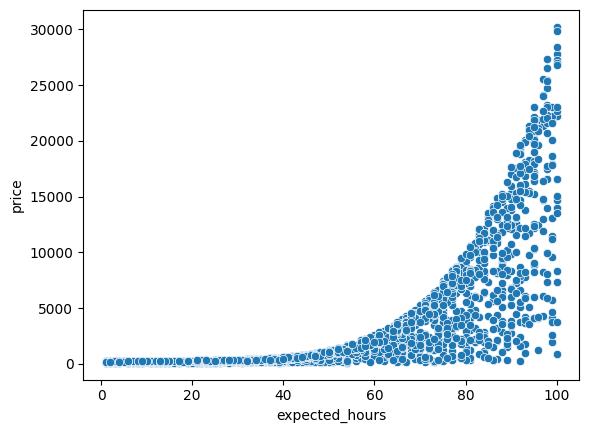

In [ ]:
sns.scatterplot(x=dados.expected_hours, y=dados.price, data=dados)

<Axes: xlabel='expected_hours', ylabel='price'>

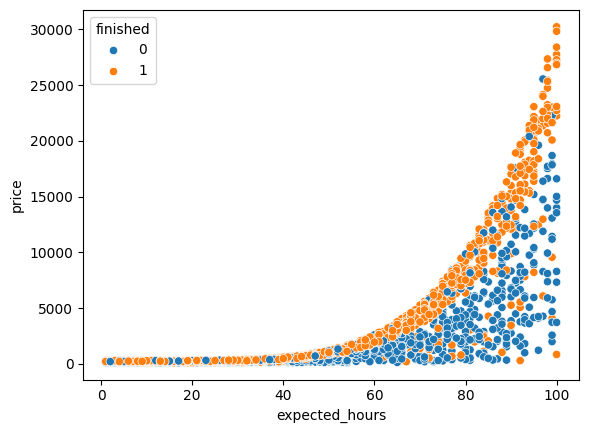

In [ ]:
sns.scatterplot(x=dados.expected_hours, y=dados.price, hue=dados.finished, data=dados)

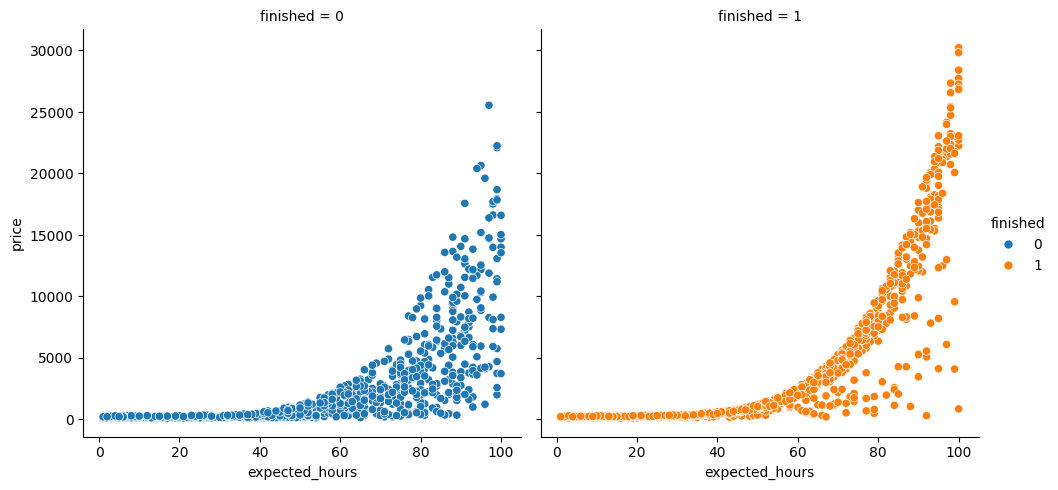

In [ ]:
sns.relplot(x=dados.expected_hours, y=dados.price, hue=dados.finished, col=dados.finished, data=dados)

In [ ]:
dados.columns

Index(['unfinished', 'expected_hours', 'price', 'finished'], dtype='object')

In [ ]:
colunas = ['expected_hours', 'price']

x = dados[colunas]
y = dados.finished

In [ ]:
SEED = 5

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=SEED,
                                                        stratify=y)
treino_x.shape, teste_x.shape, treino_y.shape, teste_y.shape

((1617, 2), (540, 2), (1617,), (540,))

In [ ]:
f'treinaremos com {len(treino_x)} elem. e testaremos com {len(teste_x)} elem.'

'treinaremos com 1617 elem. e testaremos com 540 elem.'

In [ ]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
previsões = modelo.predict(teste_x)
f'a acurácia foi de {accuracy_score(teste_y, previsões) * 100 :.2f}%'

'a acurácia foi de 57.78%'

In [ ]:
treino_y.value_counts()

1    850
0    767
Name: finished, dtype: int64

In [ ]:
f'proporção treino y = {49 / 25 :.2f}'

'proporção treino y = 1.96'

In [ ]:
teste_y.value_counts()

1    284
0    256
Name: finished, dtype: int64

In [ ]:
f'proporção treino y = {17 / 8 :.2f}'

'proporção treino y = 2.12'

In [ ]:
import numpy as np

In [ ]:
previsões_de_base = np.ones(540) # chute

In [ ]:
previsões = modelo.predict(teste_x)
f'a acurácia do algoritmo de baseline foi {accuracy_score(teste_y, previsões_de_base) * 100 :.2f}%'

'a acurácia do algoritmo de baseline foi 52.59%'

<Axes: xlabel='expected_hours', ylabel='price'>

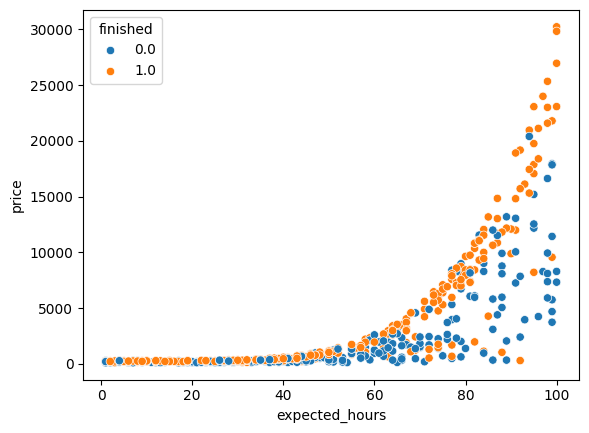

In [ ]:
sns.scatterplot(x=dados.expected_hours, y=dados.price, hue=teste_y, data=teste_x)

In [ ]:
x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()

In [ ]:
x_min, x_max

(1, 100)

In [ ]:
y_min = teste_x.price.min()
y_max = teste_x.price.max()

In [ ]:
y_min, y_max

(100, 30223)

In [ ]:
pixels = 1000

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

In [ ]:
pontos = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
import matplotlib.pyplot as plt

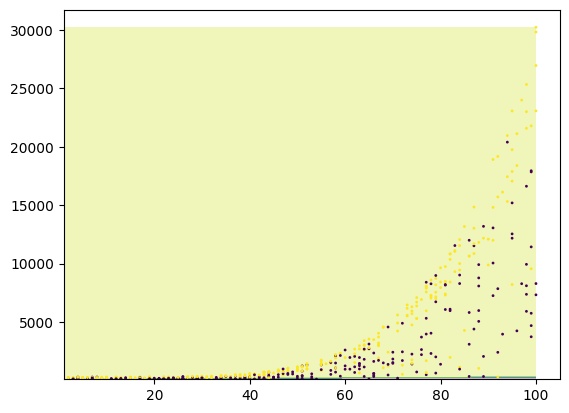

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=1)

In [ ]:
# decision boundary

In [ ]:
# precisamos de algum estimador que seja capaz de aprender mais que retas

# ✍️👨‍💻 support vector machine e a não linearidade

In [ ]:
SEED = 5
np.random.seed(SEED)

In [ ]:
from sklearn.svm import SVC

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size = 0.25,
                                                        stratify=y)

In [ ]:
f'treinaremos com {len(treino_x)} elem. e testaremos com {len(teste_x)} elem.'

'treinaremos com 1617 elem. e testaremos com 540 elem.'

In [ ]:
modelo = SVC(gamma='auto')

In [ ]:
modelo.fit(treino_x, treino_y)

SVC(gamma='auto')

In [ ]:
previsões = modelo.predict(teste_x)
f'a acurácia foi de {accuracy_score(teste_y, previsões) * 100 :.2f}%'

'a acurácia foi de 59.07%'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


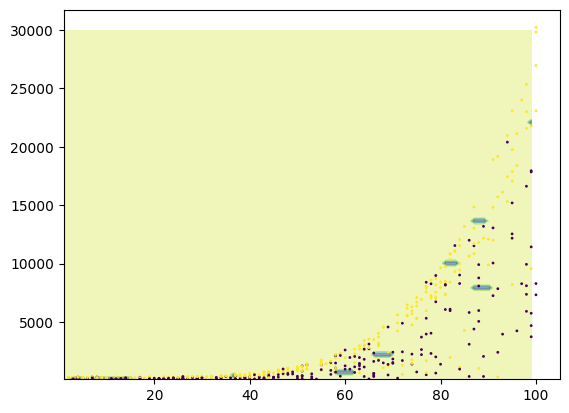

In [ ]:
x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()
y_min = teste_x.price.min()
y_max = teste_x.price.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size = 0.25,
                                                        stratify=y)

print(f'treinaremos com {len(treino_x)} elem. e testaremos com {len(teste_x)} elem.')

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)

previsões = modelo.predict(teste_x)

print(f'a acurácia foi de {accuracy_score(teste_y, previsões) * 100 :.2f}%')

treinaremos com 1617 elem. e testaremos com 540 elem.
a acurácia foi de 65.37%


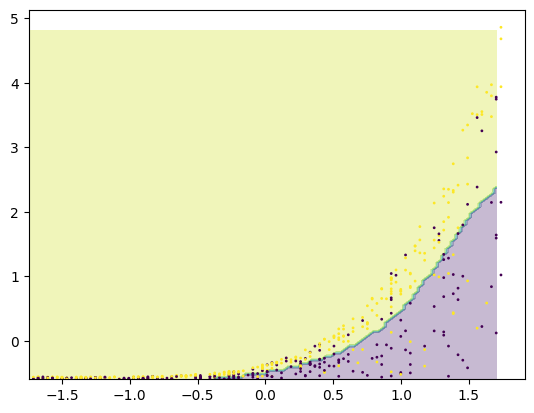

In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

# ✍️👨‍💻 dummy classifiers e árvore de decisão

In [ ]:
caminho = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

In [ ]:
dados = pd.read_csv(caminho)
dados.head(10)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
5,5,14661,2007,55405.26,yes
6,6,9990,2002,93415.61,yes
7,7,11599,2008,65265.09,no
8,8,7834,1999,43917.53,yes
9,9,14913,2003,107860.41,yes


In [ ]:
dados = dados.drop('Unnamed: 0', axis='columns')
dados.head(10)

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes
5,14661,2007,55405.26,yes
6,9990,2002,93415.61,yes
7,11599,2008,65265.09,no
8,7834,1999,43917.53,yes
9,14913,2003,107860.41,yes


In [ ]:
dados.sold = dados.sold.map({'no':0, 'yes':1})
dados.head(10)

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1
5,14661,2007,55405.26,1
6,9990,2002,93415.61,1
7,11599,2008,65265.09,0
8,7834,1999,43917.53,1
9,14913,2003,107860.41,1


In [ ]:
from datetime import datetime

dados['model_age'] = datetime.today().year - dados.model_year
dados = dados.drop('model_year', axis='columns')
dados.head(10)

,mileage_per_year,price,sold,model_age
0,21801,30941.02,1,24
1,7843,40557.96,1,26
2,7109,89627.50,0,18
3,26823,95276.14,0,9
4,7935,117384.68,1,10
5,14661,55405.26,1,17
6,9990,93415.61,1,22
7,11599,65265.09,0,16
8,7834,43917.53,1,25
9,14913,107860.41,1,21


In [ ]:
dados['km_per_year'] = dados.mileage_per_year * 1.60934
dados = dados.drop('mileage_per_year', axis='columns')
dados.head(10)

,price,sold,model_age,km_per_year
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290
5,55405.26,1,17,23594.53374
6,93415.61,1,22,16077.30660
7,65265.09,0,16,18666.73466
8,43917.53,1,25,12607.56956
9,107860.41,1,21,24000.08742


In [ ]:
dados = dados.sort_index(axis='columns')
dados.head()

,km_per_year,model_age,price,sold
0,35085.22134,24,30941.02,1
1,12622.05362,26,40557.96,1
2,11440.79806,18,89627.50,0
3,43167.32682,9,95276.14,0
4,12770.11290,10,117384.68,1


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   km_per_year  10000 non-null  float64
 1   model_age    10000 non-null  int64  
 2   price        10000 non-null  float64
 3   sold         10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB
